__AUTHORS__ = Elia Mercatanti, Matteo Gemignani

__EMAIL__ = elia.mercatanti@stud.unifi.it, matteo.gemignani@stud.unifi.it

# <center> Progetto di Analysis of Algorithms and Data Structures - 2018/2019 </center>
# <center> - Coefficienti Centrali delle Matrici di Riordan - </center>

Lo scopo di questo Notebook è quello di riprodurre alcuni risultati presentati in "On the Central Coefficients of Riordan Matrices" (Paul Barry, 2013), disponibile a questo [link](https://cs.uwaterloo.ca/journals/JIS/VOL16/Barry1/barry242.html), attraverso la libreria di Python *Sympy* per l'utlizzo del metodo simbolico.
In particolare, utilizzeremo il teorema di inversione di Lagrange per caratterizzare la funzione generatrice dei coefficienti centrali degli elementi di matrici di Riordan. Applicheremo il risultato ottenuto per calcolare la funzione generatrice dei coefficienti centrali di alcuni arrays di Riordan definiti da espressioni razionali e irrazionali.

## Definizioni su Sequenze di Interi, Inversione di Lagrange e Array di Riordan

### Funzione Generatrice

Per una sequenza di interi $a_n$, che è un elemento di $\mathbb{Z}^\mathbb{N}$, la serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ è chiamata *funzione generatrice* o f.g. della sequenza. $a_n$ è dunque il coefficiente di $t^n$ in questa serie. Rappresentiamo questo con $a_n=[t^n]f(t)$. Per esempio, $F_n=[t^n]\frac{t}{1-t-t^2}$ è l'$n$-esimo numero di Fibonacci, mentre $C_n=[t^n]\frac{1-\sqrt{1-4t}}{2t}$ è l'$n$-esimo numero di Catalan. 

### Inversa Composizionale <a name="inversa">  </a>
Per una serie di potenze $f(t)=\sum^\infty_{k=0}a_kt^k$ con $f(0)=0$ e $f'(0)\neq0$ definiamo la *reversione* o l'*inversa composizionale* di $f$ come la serie di potenze $\bar{f}(t)$ (anche scritta $f^{[-1]}(t)$) tale che:

\begin{equation}
f(\bar{f}(t))=t
\end{equation}

### Teorema di Inversione di Lagrange <a name="lagrange">  </a>

Supponiamo che una serie formale di potenze $w=w(t)$ è implicitamente definita dalla relazione $w=t\phi(w)$, dove $\phi(w)$ è una serie formale di potenze tale che $\phi(0)=0$. Quindi, per qualsiasi serie formale di potenze $F(t)$,

\begin{equation}
[t^n]F(w(t))=\frac{1}{n}[t^{n-1}]F'(t)(\phi(t))^n
\end{equation}

###  Riordan Array <a name="riordan">  </a>
Un array di Riordan è una coppia $D=\mathcal{R}(d(t), h(t))$, dove $d(t)$ e $h(t)$ sono due serie di potenze formali (due funzioni generatrici) tali che $d(0)\neq0$ e $h(0)\neq0$. La coppia definisce una matrice triangolare inferiore infinita $(d_{n,k})_{n,k\in\mathbb{N}}$, dove:

\begin{equation}
d_{n,k}=[t^n]d(t)(h(t))^k
\end{equation}

## Teorema per il Calcolo della Funzione Generatrice dei Coefficienti Centrali di una Matrice di Riordan

Sia $(d(t),h(t))=(d(t),tf(t))$ un elemento del gruppo di matrici di Riordan $\mathcal{R}$ (con $f(0)\neq0$). Sia $d_{n,k}$ l'$(n,k)$-esimo elemento di questa matrice, e sia $v(t)$ la seguente serie di potenze (con $v(0)\neq0$):

<a name="v">  </a>
\begin{equation}
v(t)=\overline{\left(\frac{t}{f(t)}\right)}.
\end{equation}

Dunque la funzione generatrice della sequenza di termini centrali $d_{2n,n}$ è data da:

<a name="d2nn">  </a>
\begin{equation}
\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t).
\end{equation}

#### Dimostrazione

Consideriamo $d_{n,k}$ come l'elemento generale dell'array di Riordan $(d(t),tf(t))$. Dunque abbiamo che

\begin{align*}
d_{2n,n} = [t^{2n}]d(t)(tf(t))^n \\
= [t^{2n}]t^nd(t)f(t)^n \\
= [t^n]\frac{d(t)}{f(t)}f(t)^{n+1} \\
= (n+1)\frac{1}{n+1}[t^n]F'(t)f(t)^{n+1},
\end{align*}

dove $F'(t)=\frac{d(t)}{f(t)}$. Applicando il teorema di inversione di Lagrange, descritto precedentemente in ([2](#lagrange)), otteniamo

\begin{align*}
d_{2n,n} = (n+1)[t^{n+1}]F(v(t)) \\
= [t^n]F'(v(t))v'(t) \\
= [t^n]\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t).
\end{align*}

## Esempio con Espressioni Razionali

Per prima cosa, importiamo la libreria Sympy che verrà utilizzata per il calcolo simbolico più alcune altre librerie per stampare in modo accurato le espressioni matematiche che utilizzeremo.

In [1]:
from sympy import init_printing
from sympy import Lambda, Eq, solve, diff, simplify, series, zeros, Matrix, binomial, symbols
from sympy.abc import t, v, r, m, k
import numpy as np

Utiliziamo la seguente funzione per stampare graficamente in modo accurato le espressioni matematiche che utilizzeremo.

In [2]:
init_printing()

Prendiamo in considerazione la seguente coppia di funzioni generatrici $d(t)=\frac{1}{1-2t}$ e $f(t)=\frac{1-2t}{1-3t}$.

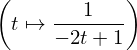

In [3]:
d = Lambda(t, 1/(1-2*t))
d

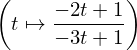

In [4]:
f = Lambda(t, (1-2*t)/(1-3*t))
f

Che formano una matrice di Riordan $\mathcal{R}(d(t), tf(t))$ ([3](#riordan)):

\begin{equation*}
\left(\frac{1}{1-2t}, \frac{t(1-2t)}{1-3t}\right)
\end{equation*}

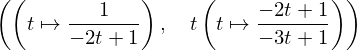

In [5]:
(d, t*f)

I coefficienti centrali di questa matrice iniziano con 1, 3, 15, 90, 579, 3858, ..., vediamo dunque come calcolarli utilizzando i teoremi e le definizioni presentate precedentemente.

Dobbiamo sostanzialmente applicare il Teorema per il calcolo della funzione generatrice dei coefficienti centrali di una matrice di Riordan, e dunque per prima cosa dobbiamo ricavare la funzione $v(t)$ definita in ([4](#v)). Che nel nostro esempio risulta quindi uguale a

\begin{equation*}
v(t)=\overline{\left(\frac{t}{f(t)}\right)}=\overline{\left(\frac{t(1-3t)}{1-2t}\right)}.
\end{equation*}

Per ricavare dunque $v(t)$ in forma esplicita dovremo calcolarci l'inversa composizionale di $\frac{t(1-3t)}{1-2t}$ applicando la definizione vista in ([1](#inversa)). Quindi $v(t)$ è la soluzione appropriata (con $v(0)=0$) della seguente equazione:

\begin{equation*}
\frac{v(1-3v)}{1-2v}=t.
\end{equation*}

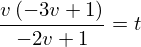

In [6]:
equation = Eq(v/f(v), t)
equation

Risolviamo l'equazione:

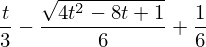

In [7]:
sol = solve(equation, v)
sol[0]

Troviamo dunque che la soluzione corretta è:

\begin{equation*}
v(t)=\frac{1+2t-\sqrt{1-8t+4t^2}}{6}.
\end{equation*}

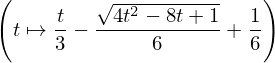

In [8]:
v = Lambda(t, sol[0])
v

A questo punto non ci resta che applicare il principale risultato del teorema, ovvero, per trovare la funzione generatrice $d_{2n,n}$ dei coefficienti centrali basterà calcolare la formula ([5](#d2nn)), nel nostro esempio con

\begin{equation*}
\frac{d(t)}{f(t)}=\frac{1-3t}{(1-2t)^2}.
\end{equation*}

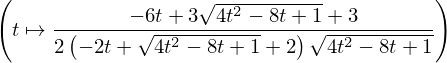

In [9]:
d_2n_n = Lambda(t, d(v(t))/f(v(t)) * diff(v(t), t))
d_2n_n = simplify(d_2n_n)
d_2n_n

Troviamo dunque che la funzione generatrice $d_{2n,n}$ è data da:

\begin{equation*}
d_{2n,n}=\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t)=\frac{1+2t+\sqrt{1-8t+4t^2}}{2\sqrt{1-8t+4t^2}}.
\end{equation*}

Che in forma in serie di potenze diventa:

In [10]:
fg = series(d_2n_n(t), t, n=10)
fg

E in questa forma è facilmente osservabile come i primi coefficenti di tale serie siano effettivamente 1, 3, 15, 90, 579, 3858, ... 

Per una prova finale possiamo stampare la matrice di Riordan corrispondente alle due funzioni generatrici scelte ($d(t)$ e $f(t)$) e verificare che i suoi coefficienti centrali siano effetivamente quelli indicata dalla funzione generatrice $d_{2n,n}$ appena calcolata. Calcoliamo dunque tale matrice limitandoci ad un numero di righe e colonne pari a $n$, definito qui sotto.

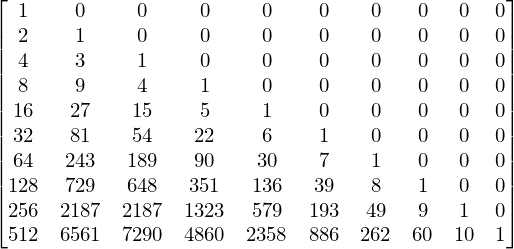

In [11]:
n = 10
riordan_matrix = zeros(n)
for column in range(n):
    d_n_k = Lambda(t, d(t)*(t*f(t))**column)
    a_n = series(d_n_k(t), t, n=n)
    for row in range(n):
        riordan_matrix[row, column] = a_n.coeff(t, n=row)
riordan_matrix

Se riportiamo i termini della matrice precedente ad una forma a "piramide" possiamo scovare agilmente i coefficienti centrali di tale matrice. Tali termini infatti sono tutti quelli che sono presenti nella colonna centrale e più "alta" di numeri.

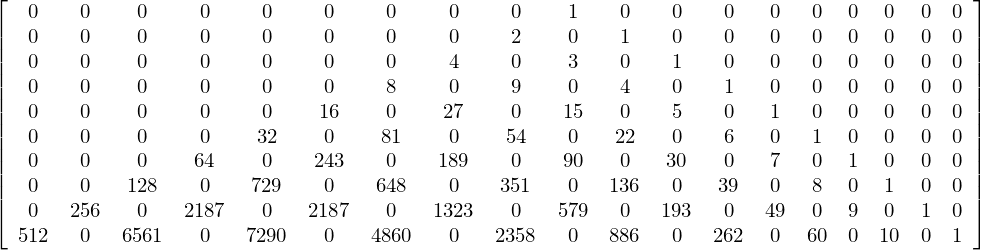

In [12]:
triangle = zeros(n, n*2-1)
for i in range(n):
    row = np.array(riordan_matrix[n-i-1, 0:n-i])
    temp = np.zeros((1, n*2-2*i-1), dtype=row.dtype)
    temp[:,::2] = row
    triangle[n-i-1, i:n*2-i-1] = temp
triangle

Osservando la matrice precedente possiamo confermare senza ombra di dubbio che i primi coefficienti centrali della matrice di Riordan considerata sono proprio 1, 3, 15, 90, 579, 3858, ... 

Possiamo generalizzare il risultato precedente attraverso il seguente array di Riordan con $d(t)=\frac{1}{1-rt}$ e $f(t)=\frac{1-rt}{1-(r+1)t}$:

\begin{equation*}
\left(\frac{1}{1-rt}, \frac{t(1-rt)}{1-(r+1)t}\right).
\end{equation*}

Ripetendo i medesimi passaggi visti prima ricaviamo la funzione generatrice $d_{2n,n}$ per i termini centrali del nuovo array di Riordan.

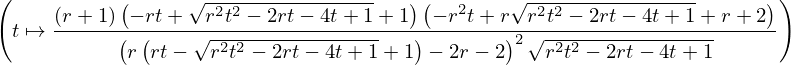

In [13]:
d = Lambda(t, 1/(1-r*t))
f = Lambda(t, (1-r*t)/(1-(r+1)*t))
equation = Eq(v/f(v), t)
sol = solve(equation, v)
v = Lambda(t, sol[0])
d_2n_n = Lambda(t, d(v(t))/f(v(t)) * diff(v(t), t))
d_2n_n = simplify(d_2n_n)
d_2n_n

Che semplificata ulteriormente da come risultato:
    
\begin{equation*}
d_{2n,n}=\frac{d(v(t))}{f(v(t))}\frac{d}{dt}v(t)=\frac{1+rt+\sqrt{1-2(r+2)t+r^2t^2}}{2\sqrt{1-2(r+2)t+r^2t^2}}.
\end{equation*}

L'elemento generale di $\left(\frac{1}{1-rt}, \frac{t(1-rt)}{1-(r+1)t}\right)$, considerando la definizione in ([3](#riordan)) è dato da:

\begin{equation*}
d_{n,k}=[t^n]\frac{1}{1-rt}\left(\frac{t(1-rt)}{1-(r+1)t}\right)^k.
\end{equation*}

Applicando poi il teorema di inversione di Lagrange ([2](#lagrange)) otteniamo la seguente espressione:

\begin{equation*}
d_{2nn,n}=\sum^n_{k=0}\binom{n-1}{k}\binom{2n-k-1}{n-k}(-r)^k(r+1)^{n-k}.
\end{equation*}

La funzione generatrice bivariata seguente

\begin{equation*}
\mathcal{G}\ (t,y) = \frac{1+yt+\sqrt{1-2(y+2)t+y^2t^2}}{2\sqrt{1-2(y+2)t+y^2t^2}}
\end{equation*}

è invece la funzione generatrice della matrice triangolare inferiore con elemento generale pari a

\begin{equation*}
\binom{n}{k}\binom{2n-k-1}{n-k},
\end{equation*}

e quindi abbiamo anche che

\begin{equation*}
d_{2nn,n}=\sum^n_{k=0}\binom{n}{k}\binom{2n-k-1}{n-k}r^k.
\end{equation*}

Possiamo osservare che tale matrice triangolare inferiore, limitandoci ad un numero di righe e colonne pari a $n$ definito qui sotto, ha la seguente forma.

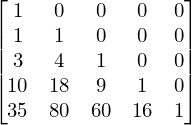

In [14]:
n = 5
d_n_k = Lambda([m, k], binomial(m, k)*binomial(2*m-k-1, m-k))
riordan_matrix = zeros(n)
for row in range(n):
    for column in range(n):
        riordan_matrix[row, column] = d_n_k(row, column)
riordan_matrix

Ed infine anche in questo caso possiamo individuare agilmente i coefficienti centrali della matrice precedente se riportiamo i suoi termini ad una forma a "piramide".

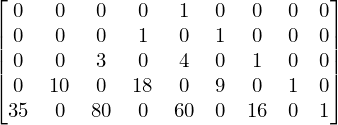

In [15]:
triangle = zeros(n, n*2-1)
for i in range(n):
    row = np.array(riordan_matrix[n-i-1, 0:n-i])
    temp = np.zeros((1, n*2-2*i-1), dtype=row.dtype)
    temp[:,::2] = row
    triangle[n-i-1, i:n*2-i-1] = temp
triangle

## Esempio con Espressioni Irrazionali
Importimo le librerie utili per utilizzare SymPy

In [16]:
import math
from sympy import sqrt, eye

Dobbiamo analizzare la coppia $$\bigg(\frac{1}{\sqrt{1-4t}},\frac{t}{c(t)}\bigg)$$
dove $$c(t)=\frac{1-\sqrt{1-4t}}{2t}$$
Quindi adesso utilizando la classe *Lambda* disponibile nel pacchetto definisco la prima funzione 

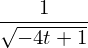

In [17]:
d = Lambda([t], 1/(sqrt(1-4*t)))
d(t)

In modo anlogo a prima definico $f(t)$ che in questo caso corrisponde a $\frac{1}{c(t)}$ 

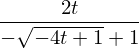

In [18]:
f= Lambda([t], (2*t)/(1-sqrt(1-4*t)))
f(t)

Quindi la matrice di *Riordan* verrà costruita come segue: l'elemento $r_{i,j}$ sarà:$$r_{i,j}=[t^i]d(t)(tf(t))^j$$  quella delle funzioni sopra citate sarà:

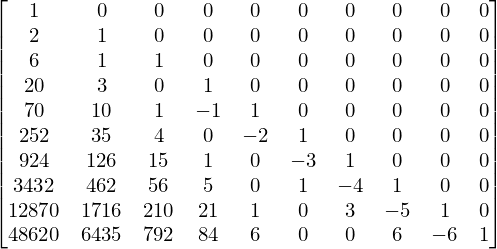

In [19]:
n = 10
riordan_matrix = zeros(n)
for column in range(n):
    d_n_k = Lambda(t, d(t)*(t*f(t))**column)
    a_n = series(d_n_k(t), t, n=n)
    for row in range(n):
        riordan_matrix[row, column] = a_n.coeff(t, n=row)
riordan_matrix

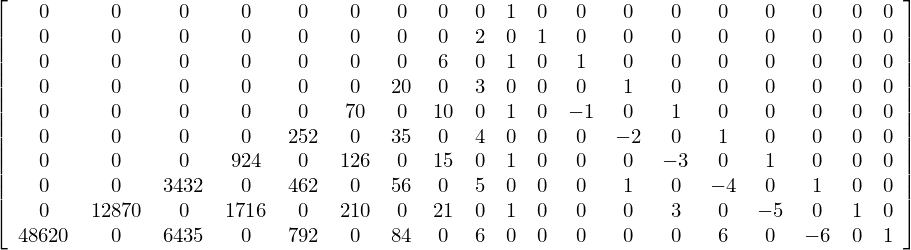

In [20]:
triangle = zeros(n, n*2-1)
for i in range(n):
    row = np.array(riordan_matrix[n-i-1, 0:n-i])
    temp = np.zeros((1, n*2-2*i-1), dtype=row.dtype)
    temp[:,::2] = row
    triangle[n-i-1, i:n*2-i-1] = temp
triangle

Dalla tabella vediamo che i coefficenti centrali sono $1,1,1,\cdots$ adesso quindi per dimostrare il teorema basterà dimostrare che la funzione generatrice dei coefficienti centrali corisponde a $\mathcal{G}(1)=\frac{1}{1-t}$

Come abbimo fatto negli esempi precendeti ricaviamo $v(t)$ impostando l'equazione:
$$vc(t)=t$$

In [21]:
vT=(1/f(v))*v
eq=Eq(vT, t)
sols = solve(eq, v)
v2= Lambda([t],sols[0])
v2

quindi calcoliamo il rapporto, il rapporto della composizione delle funzioni e la derivata di $v(t)$

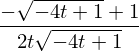

In [22]:
d(t)/f(t)

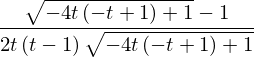

In [23]:
rapp=simplify(d(v2(t))/f(v2(t)))
rapp

In [24]:
der=diff(v2(t),t)
der

Adesso abbiamo tutto il necessario per calcolare la funzione generatrice definita dal teorema

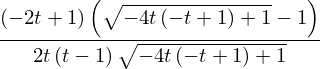

In [25]:
f_gen=Lambda([t],(rapp*der))
f_gen(t)

si vede bene che questa funzione corisponde a $\mathcal{G}(1)$ ma per essere scrupolosi risolviamo l'equazione

In [26]:
j= Lambda([t],1/(1-t))
eq=Eq(f_gen(t), j(t))
solve(eq,t)

L'equazione torna vuota, ovvero che le due espressioni sono uguali.

Inoltre vediamo che la forma in serie di potenze corrisponde a quanto detto sopra

In [27]:
series(f_gen(t), t, n=4)

Il secondo esempio prevede di definire $f(t)=c(t)$, seguendo i soliti passaggi arriviamo ad ottenere la funzione generatrice.

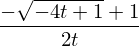

In [28]:
f= Lambda([t], (1-sqrt(1-4*t))/(2*t))
f(t)

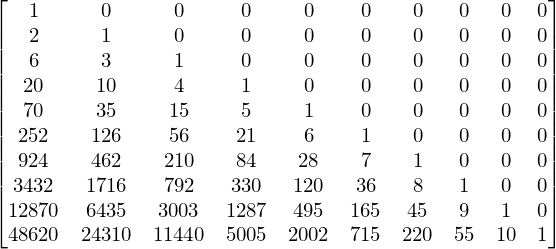

In [29]:
n = 10
riordan_matrix = zeros(n)
for column in range(n):
    d_n_k = Lambda(t, d(t)*(t*f(t))**column)
    a_n = series(d_n_k(t), t, n=n)
    for row in range(n):
        riordan_matrix[row, column] = a_n.coeff(t, n=row)
riordan_matrix

Questa matrice ha come elemento generale

\begin{equation*}
d_{n,k}=\binom{2n-k}{k}.
\end{equation*}

Quindi abbiamo che

\begin{equation*}
d_{2n,n}=\binom{3n}{2n}=\binom{3n}{n}.
\end{equation*}

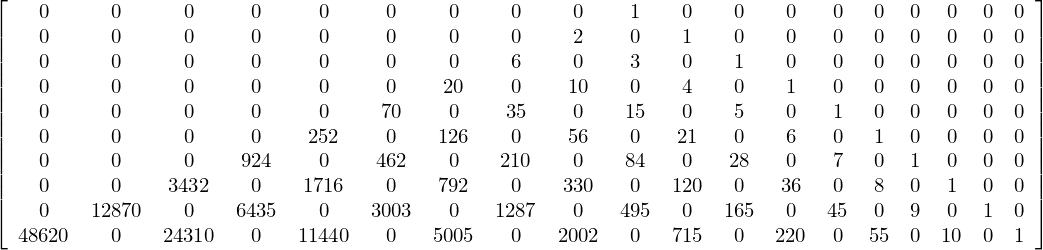

In [30]:
triangle = zeros(n, n*2-1)
for i in range(n):
    row = np.array(riordan_matrix[n-i-1, 0:n-i])
    temp = np.zeros((1, n*2-2*i-1), dtype=row.dtype)
    temp[:,::2] = row
    triangle[n-i-1, i:n*2-i-1] = temp
triangle

Infatti osservando la matrice precedente possiamo facilmente notare che i coefficienti centrali sono 1, 3, 15, 84, 495, ... come definiti dal coefficiente binomiale precedente.

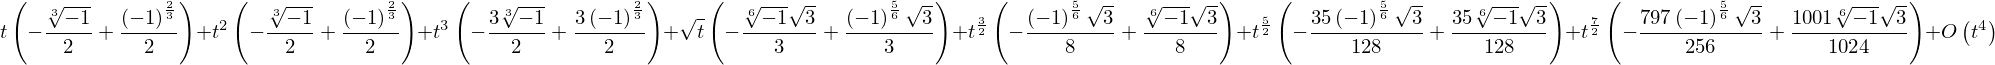

In [31]:
vT=(v/f(v))
eq=Eq(vT, t)
sols = solve(eq, v)
v2= Lambda([t],sols[0])
series(v2(t), t, n=4)

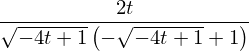

In [32]:
d(t)/f(t)

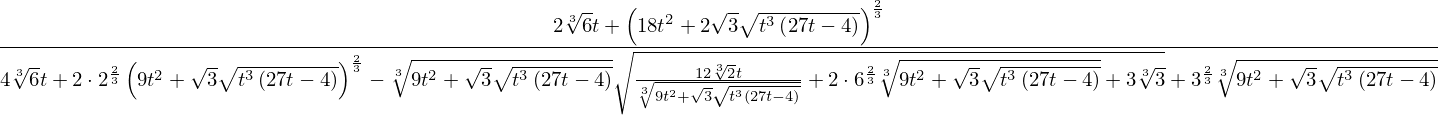

In [33]:
rapp=simplify(d(v2(t))/f(v2(t)))
rapp

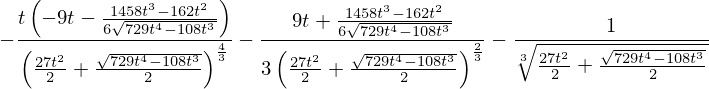

In [34]:
der=diff(v2(t),t)
der

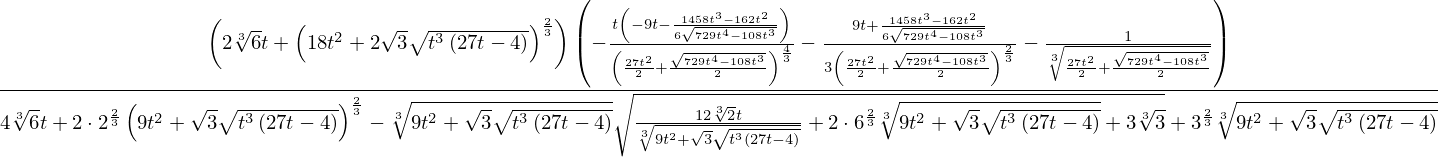

In [35]:
f_gen=Lambda([t],(rapp*der))
f_gen(t)

Vediamo che anche nel caso di questo array di Riordan relativamente semplice la funzione generatrice dei termini centrali e' tutt'altro che elementare.